# Determine the value of $\pi$ using Monte Carlo simulation

## How it works

* Area of a circle = $\pi r^{2}$
* Imagine a square of length r. You can fit one-quarter of a circle inside
* The Monte Carlo simulation generates random points in the square
* We determine whether a point is inside or outside the quarter circle region
  * Let k = number of points that are inside the quarter circle
  * Let m = total number of points randomly created by the Monte Carlo simulation
* The ratio of the areas (quarter circle and square) are equivalent to the proportion of k and m
  * Formally, area of quarter circle / area of square = k / m
  * $\pi r^{2}$ / 4 $r^{2}$ = k / m
  * $\pi$ = 4k / m


In [4]:
# Core libraies
import pandas as pd
import random
import time

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Functions

In [5]:
def create_points_dataframe(inside_circle, outside_circle):
    points_inside = pd.DataFrame()
    points_outside = pd.DataFrame()

    # Create DataFrame of points lying inside the quarter-circle
    x, y = zip(*inside_circle)
    points_inside['x'] = x
    points_inside['y'] = y
    points_inside['inside'] = 1

    # Create DataFrame of points lying outside the quarter-circle
    x, y = zip(*outside_circle)
    points_outside['x'] = x
    points_outside['y'] = y
    points_outside['inside'] = 0

    # Combine DataFrames
    points_df = pd.concat([points_inside, points_outside])
    points_df.reset_index(drop=True, inplace=True)
    return points_df


def calculate_hypotenuse(x, y):
    # Square root of x squared plus y squared
    return (x**2 + y**2)**0.5


def approximate_pi(num_points):
    # Store (x, y) of points that are inside and outside of the quarter circle
    inside_circle = []
    outside_circle = []  
    num_points_circle = 0
    for i in range(num_points):
        # Random number between 0 and 1
        x, y = random.random(), random.random()
        
        # Determine if (x, y) is within the quarter circle
        hypotenuse = calculate_hypotenuse(x, y)
        if hypotenuse <= 1:
            inside_circle.append((x, y))
            num_points_circle += 1
        else:
            outside_circle.append((x, y))
    points_df = create_points_dataframe(inside_circle, outside_circle)
    approx_pi = 4 * (num_points_circle / num_points)
    return approx_pi, points_df

## Monte Carlo simulation

$\pi$ is an irrational number but its value to the first 7 decimal places is 3.1415927. The estimate of $\pi$ gets closer to its true value as we increase the number of simulated points.

| Number of simulated points  | Value of $\pi$  |
|-----------------------------|-----------------|
| 1k                          | 3.08            |
| 10k                         | 3.1572          |
| 100k                        | 3.13708         |
| 1M                          | 3.14056         |
| 10M                         | 3.1412828       |

![](images/pi_1000.png)

![](images/pi_10000.png)

![](images/pi_100000.png)

![](images/pi_1000000.png)

![](images/pi_10000000.png)

pi = 3.08 approximated using 1000 simulated points
time taken: 0.016 seconds



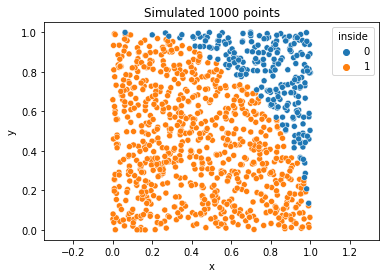

pi = 3.1572 approximated using 10000 simulated points
time taken: 0.312 seconds



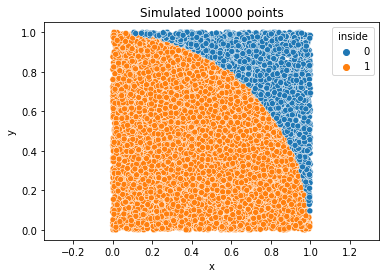

pi = 3.13708 approximated using 100000 simulated points
time taken: 0.141 seconds



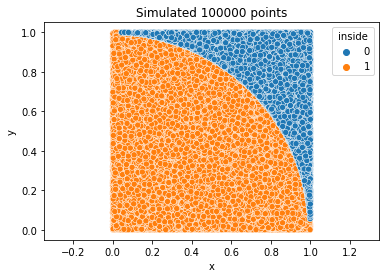

pi = 3.14056 approximated using 1000000 simulated points
time taken: 3.14 seconds



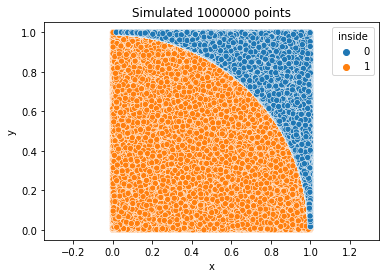

pi = 3.1412828 approximated using 10000000 simulated points
time taken: 26.328 seconds



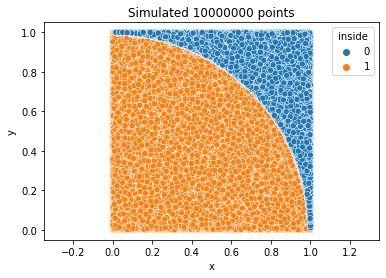

In [6]:
for points in [1000, 10000, 100000, 1000000, 10000000]:
    filename = f"images/pi_{points}.png"
    start = time.monotonic()
    approx_pi, points_df = approximate_pi(points)
    print(f"pi = {approx_pi} approximated using {points} simulated points")
    end = time.monotonic()
    print(f"time taken: {round(end-start, 3)} seconds\n")
    sns.scatterplot(data=points_df, x='x', y='y', hue='inside')
    plt.title(f"Simulated {points} points")
    plt.axis([0, 1, 0, 1])
    plt.axis('equal')
    plt.savefig(filename)
    plt.show()